# Bootstrap and Jackknife Estimation

In [ ]:
suppressPackageStartupMessages({
  library(knitr)
  library(readr)
  library(tidyverse)
  library(car)
  library(caret)
  library(pscl)
  library(boot)
  library(bootstrap)

})

### Objective

Political dynasties are deep-rooted in the Philippines with nearly 250 political families dominating the politics across the country—at all levels from the brangays to the Senate. In this environment, a well-known surname often translates directly into votes, highlighting the advantage of name recall for successful electoral bids. Dynasties are likewise highly persistent in the entertainment industry. As such,  celebrities  who combine their personal fame and prominent political lineage may significantly boost their electoral prospects.

To better understand the extent and persistence of political dynasties, bootstrap and jackknife resampling methods will be used to quantify the uncertainty around the actors' average number of family in politics, estimating its bias, variance, and a 95% confidence interval.

In [2]:
actors <- read_csv("https://raw.githubusercontent.com/zkdlyn/APM1210_SA2/refs/heads/main/celebrity_sample30.csv",
show_col_types = FALSE)

head(actors,5)

name,years_active,imdb_credits,family,education,politics,wins
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sam Milby,20,60,0,0,0,0
Daniel Padilla,15,34,1,0,0,1
Nadine Lustre,24,47,0,1,0,5
Bea Alonzo,23,51,0,1,0,0
Alden Richards,14,55,0,1,0,0


In [32]:
summary(actors$family)
table(actors$family)
mean <- mean(actors$family)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.5000  0.8667  1.0000  4.0000 


 0  1  2  4 
15  8  5  2 

### Bootstrap Estimation

In [ ]:
set.seed(2025)
B        <- 500
bs_est <- numeric(B)

for(b in 1:B) {
    i <- sample(1:nrow(actors), n,replace = TRUE)
    sample <- actors[i,]
    bs_est[b] <- mean(sample$family)
}

mean_boot     <- mean(bs_est)
bias_boot     <- mean(boot_mean - mean)
# var_boot <- var(boot_out$t))
se_boot <- sd(bs_est)

summary_bs <- (data.frame(
    Mean = mean,
    Mean_Est = mean_boot,
    Bias = bias_boot,
    SE = se_boot
))


kable(t(summary_bs))



|         |           |
|:--------|----------:|
|Mean     |  0.8666667|
|Mean_Est |  0.8544667|
|Bias     | -0.0122000|
|SE       |  0.2036301|

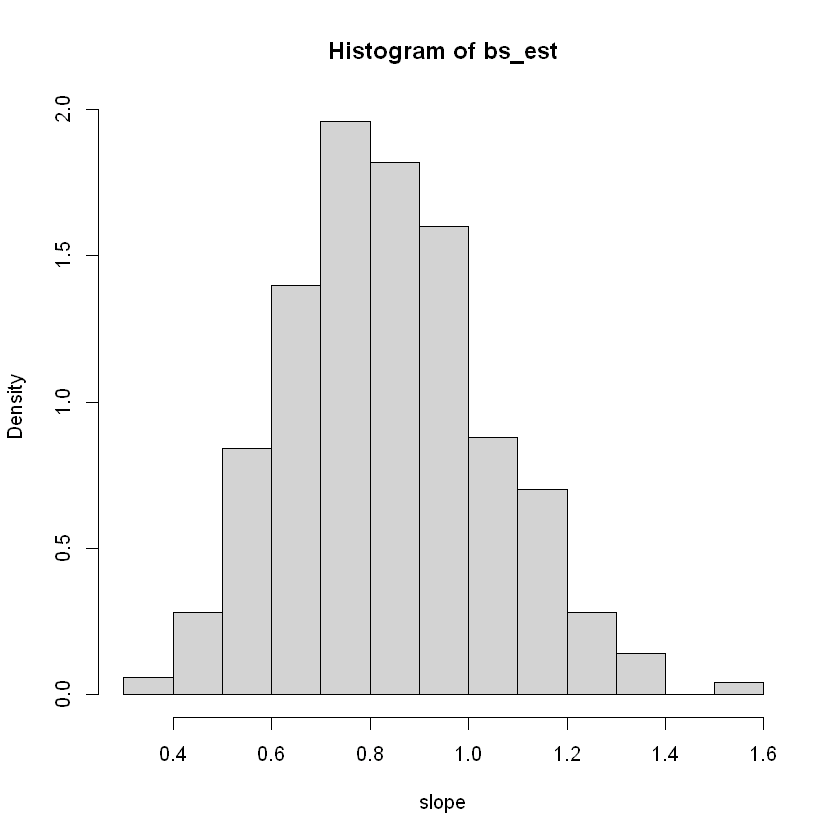

In [50]:
hist(bs_est,prob=TRUE,xlab="slope")

In [57]:
CI <- quantile(bs_est, probs = c(0.025, 0.975))
names(CI) <- c("Lower 95%", "Upper 95%")
CI

Lower 95% Upper 95% 
 0.500000  1.284167

The original sample mean of politically connected family members is 0.867, and the bootstrap mean of 0.854 closely matches it, yielding a small negative bias of -0.0122. This indicates our sample mean is a reliable estimator with negligible systematic error. The bootstrap variance of 0.0419 corresponds to a standard error of about 0.204, reflecting moderate spread in the resampled means. The 95 % percentile confidence interval ranges from 0.50 to 1.28, suggesting that the true average number of immediate family members in politics per actor lies betweenthe said range.

### Jackknife

In [41]:
n <- nrow(actors)
reps <- numeric(n)

for (i in 1:n) {
  sample_jk <- actors[-i, ]
  reps[i] <- mean(sample_jk$family)
}

mean_jk <- mean(reps)
bias_jk <- (n-1)* (mean_jk - mean)
var_jk <- ((n-1)/n)* mean((reps - mean_jk)^2)
se_jk  <- sqrt(var_jk)


summary_jk <- (data.frame(
    Mean = mean,
    Mean_Est = mean_jk,
    Bias = bias_jk,
    Var  = var_jk,
    SE = se_jk
))

kable(t(summary_jk))



|         |          |
|:--------|---------:|
|Mean     | 0.8666667|
|Mean_Est | 0.8666667|
|Bias     | 0.0000000|
|Var      | 0.0014355|
|SE       | 0.0378881|